In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline

import webscrape

/Users/bumho/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [68]:
athlete = "stephen curry"
season = "2014-15"
web_df = webscrape.getData(athlete, season[:-3])

In [69]:
def shot(s_type):
    if "jump shot" in s_type.lower():
        return "jump"
    elif "layup shot" in s_type.lower():
        return "layup"
    else:
        return "else"
    
def shot_dist(dist):
    if dist < 8:
        return "less than 8"
    elif dist < 16:
        return "8-16"
    elif dist < 24:
        return "16-24"
    else:
        return "24+"
    
def def_dist(dist):
    if dist < 2:
        return "0-2"
    elif dist < 4:
        return "2-4"
    elif dist < 6:
        return "4-6"
    else:
        return "6+"

In [70]:
logistic = LogisticRegression()

In [71]:
def transform_web(data):
    data = data.copy()
    shot_type = pd.get_dummies(data["Shot Type"].apply(shot))
    data["Shot Dist."] = data["Shot Dist."].apply(lambda x : float(x.replace("ft.", "")))
    shot_clock = data["Shot Clock"].apply(lambda x: float(x))
    touch_time = data["Touch Time"].apply(lambda x: float(x))
    drib = data["Drib."].apply(lambda x: int(x))
    data["Def Dist."] = data["Def Dist."].apply(lambda x: float(x))

    def_dist_c = pd.get_dummies(data["Def Dist."].apply(def_dist))

    
    shot_dist_c = pd.get_dummies(data["Shot Dist."].apply(shot_dist))
    
    con = [shot_type, shot_clock, touch_time, drib, data["Shot Dist."],data["Def Dist."],def_dist_c, 
           shot_dist_c, (data["Made?"]=="Yes").astype(int)]
    new_shot_chart = pd.concat(con , axis=1)
    return new_shot_chart

tt = transform_web(web_df)
tt

,else,jump,layup,Shot Clock,Touch Time,Drib.,Shot Dist.,Def Dist.,0-2,2-4,4-6,6+,16-24,24+,8-16,less than 8,Made?
0,1,0,0,16.0,6.3,8,5.2,3.2,0,1,0,0,0,0,0,1,1
1,1,0,0,2.9,4.5,5,13.6,1.7,1,0,0,0,0,0,1,0,1
2,1,0,0,9.3,0.8,0,6.0,3.7,0,1,0,0,0,0,0,1,1
3,1,0,0,15.3,8.7,10,9.0,2.3,0,1,0,0,0,0,1,0,1
4,1,0,0,20.8,0.8,0,4.1,2.5,0,1,0,0,0,0,0,1,1
5,0,0,1,20.9,1.8,1,4.4,3.8,0,1,0,0,0,0,0,1,0
6,0,0,1,21.0,2.9,3,6.1,4.1,0,0,1,0,0,0,0,1,0
7,0,0,1,14.5,3.1,2,6.2,0.3,1,0,0,0,0,0,0,1,1
8,0,0,1,18.3,4.4,5,6.1,2.7,0,1,0,0,0,0,0,1,0
9,0,0,1,13.6,10.5,14,4.6,4.3,0,0,1,0,0,0,0,1,1


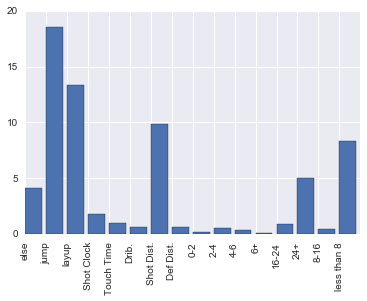

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

predictors = tt.columns[:-1]

selector = SelectKBest(k=5)
selector.fit(tt[predictors], tt["Made?"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(scores)), scores)
plt.xticks(np.arange(.2, len(scores)+.2), predictors, rotation="vertical")
plt.show()

In [64]:
def trials(n, model, X, pred1, pred2, y, show_coef = True):

    x1_ma = np.zeros(n,)
    x2_ma = np.zeros(n,)
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5)
        model.fit(X_train[pred1], y_train)
        x1_ma[i] = model.score(X_test[pred1], y_test)
        
        model.fit(X_train[pred2], y_train)
        x2_ma[i] = model.score(X_test[pred2], y_test)

    print "X1", x1_ma.mean()
    print "X2", x2_ma.mean()
    print x1_ma.mean() - x2_ma.mean()
    if show_coef:
        print model.coef_
    return x1_ma - x2_ma

X1 0.578912071535
X2 0.610476900149
-0.031564828614
[[ 0.00088081  0.53894213 -0.65404912  0.51266394]]


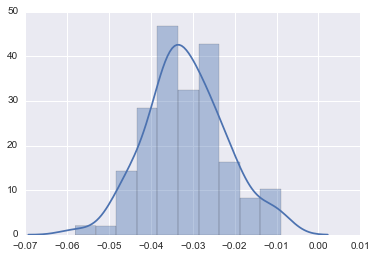

In [74]:
# predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8']
predictor1 = ['Shot Dist.']
predictor2 = predictor1 + [u'else', u'jump', u'layup']
a = trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])
sns.distplot(a)
# plt.savefig("./graphs/compareShotDist&Type.png")

Adding the type of shot definitely helps the accuracy 

X1 0.604456035768
X2 0.61304023845
-0.00858420268256
[[ 0.05282477 -0.47568306  0.12662859  0.23364705  0.58424827 -0.86412093
   0.21729001  0.1543499 ]]


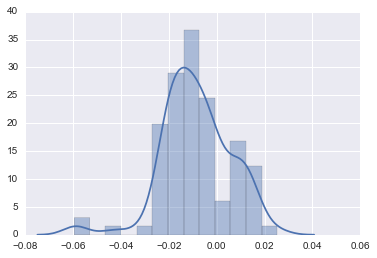

In [75]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Def Dist.']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])
sns.distplot(a)
# plt.savefig("./graphs/compareBase&DefDist.png")

Adding defender distance also seems to helps the accuracy

In [100]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ [u'0-2',u'2-4',u'4-6', u'6+']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])

X1 0.608301043219
X2 0.603532041729
0.00476900149031
[[ 0.01112231  0.06207442  0.19602153  0.01132191  0.3663715  -0.75636826
   0.67053694 -0.46550875  0.11569868  0.1532014   0.47714885]]


Strangely when we binarize the defender distance, it seems to lower the accuracy

X1 0.605976154993
X2 0.604962742176
0.00101341281669
[[ 0.0485705   0.00627916  0.12106486  0.09334297  0.30381742 -0.53717729
   0.50261736 -0.03704854]]


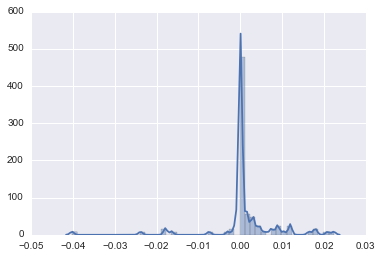

In [77]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Touch Time']
a=trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])
sns.distplot(a)
# plt.savefig("./graphs/compareBase&TouchTime.png")

In [102]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Shot Clock']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])

X1 0.605096870343
X2 0.60478390462
0.000312965722802
[[ 0.09960512 -0.05340484  0.30307835 -0.1399905   0.47571794 -0.9408995
   0.67446969  0.02021865]]


Both touch time and shot clock does not really seem to help the model's performance

In [31]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup', 'Def Dist.']

Just looking at stephs is misleading and it could be overfitting to his shots
also we do not have enough shots and we would like more
Lets create a guard model and 

In [80]:
guards_100 = [
    "James Harden","Damian Lillard","Chris Paul","John Wall","Eric Bledsoe","Joe Johnson","Kyrie Irving","Monta Ellis",
     "Tyreke Evans","Ben McLemore","Ty Lawson","Goran Dragic","Stephen Curry","Kentavious Caldwell-Pope","Victor Oladipo",
     "Jimmy Butler","Arron Afflalo","Elfrid Payton","Klay Thompson","Avery Bradley","Kyle Korver","Kyle Lowry",
     "JJ Redick","Mario Chalmers","Courtney Lee","Gerald Henderson","Danny Green","Russell Westbrook","Trey Burke",
     "Reggie Jackson","Evan Turner","Jarrett Jack","Jeff Teague","Mike Conley","Dion Waiters","Michael Carter-Williams",
     "Kemba Walker","Deron Williams","Bradley Beal","DeMar DeRozan","J.R. Smith","Andre Iguodala","Brandon Knight",
     "Wesley Matthews","Eric Gordon","Rajon Rondo","Lou Williams","Greivis Vasquez","Mo Williams","Dwyane Wade","D.J. Augustin",
     "Tony Parker","Jeremy Lin","Zach LaVine","Aaron Brooks","Rodney Stuckey","Shane Larkin","Bojan Bogdanovic","CJ Miles",
     "Norris Cole","Dante Exum","Marcus Smart","Anthony Morrow","Quincy Pondexter","Hollis Thompson","Alan Anderson",
     "Patrick Beverley","Isaiah Thomas","Jerryd Bayless","Jamal Crawford","O.J. Mayo","Devin Harris","Tim Hardaway",
     "Wayne Ellington","Evan Fournier","Tony Allen","Jason Terry","Kirk Hinrich","Manu Ginobili","Lance Stephenson",
     "Darren Collison","Austin Rivers","Iman Shumpert","Derrick Rose","Steve Blake","Dennis Schroder","Rasual Butler",
     "Beno Udrih","Jordan Clarkson","Shaun Livingston","Jodie Meeks","Langston Galloway","Gerald Green","Cory Joseph",
     "Ray McCallum","CJ Watson","Tony Snell","Jameer Nelson","Marco Belinelli","Matthew Dellavedova"
]

forwards_100 = [
    "Andrew Wiggins","Trevor Ariza","Pau Gasol","Gordon Hayward","Markieff Morris","Giannis Antetokounmpo","Kevin Love",
    "LaMarcus Aldridge","LeBron James","Draymond Green","Wilson Chandler","Anthony Davis","Jeff Green","Thaddeus Young",
    "Luol Deng","Rudy Gay","Paul Millsap","PJ Tucker","Solomon Hill","Nicolas Batum","Khris Middleton","Tobias Harris",
    "Blake Griffin","Harrison Barnes","Al Horford","Nerlens Noel","Zach Randolph","Josh Smith","Dirk Nowitzki",
    "Derrick Favors","Matt Barnes","Wesley Johnson","Tim Duncan","Tristan Thompson","DeMarre Carroll","Chandler Parsons",
    "Patrick Patterson","Serge Ibaka","Terrence Ross","Corey Brewer","Kenneth Faried","Marcus Morris","Donatas Motiejunas",
    "Marvin Williams","Kawhi Leonard","Jason Thompson","Boris Diaw","Amir Johnson","Robert Covington","Brandon Bass",
    "Paul Pierce","David West","Channing Frye","Ed Davis","Mike Dunleavy","Jason Smith","Mason Plumlee",
    "Kyle Singler","Tyler Zeller","Jared Dudley","Taj Gibson","Ryan Anderson","Joe Ingles","Luis Scola",
    "Nikola Mirotic","Dante Cunningham","Jae Crowder","Caron Butler","Michael Kidd-Gilchrist","Jared Sullinger","Trevor Booker",
    "Chris Bosh","Lance Thomas","Cody Zeller","Derrick Williams","Brandan Wright","Otto Porter","Anthony Tolliver",
    "Carmelo Anthony","Danilo Gallinari","Kelly Olynyk","Omri Casspi","JJ Hickson","Tayshaun Prince","Jerami Grant",
    "James Johnson","Al-Farouq Aminu","Kris Humphries","Ersan Ilyasova","Quincy Acy","Chase Budinger","Amar'e Stoudemire",
    "Richard Jefferson","Kevin Seraphin","Ryan Kelly","Jonas Jerebko","John Henson","Carl Landry"
]

centers_100 = [
    "DeAndre Jordan","Marc Gasol","Nikola Vucevic","Andre Drummond","Marcin Gortat","Tyson Chandler","Gorgui Dieng",
    "Rudy Gobert","Greg Monroe","Enes Kanter","Brook Lopez","Jonas Valanciunas","Joakim Noah","Timofey Mozgov",
    "DeMarcus Cousins","Al Jefferson","Omer Asik","Roy Hibbert","Jordan Hill","Steven Adams","Zaza Pachulia",
    "Robin Lopez","Andrew Bogut","Alex Len","Henry Sims","Chris Kaman","Kosta Koufos","Spencer Hawes","Bismack Biyombo",
    "Dwight Howard","Marreese Speights","Tarik Black","Miles Plumlee","Kendrick Perkins","Ian Mahinmi","Hassan Whiteside",
    "Robert Sacre","Aron Baynes","Jusuf Nurkic","Cole Aldrich","Alexis Ajinca","Meyers Leonard","Dewayne Dedmon",
    "Kyle O'Quinn","Nikola Pekovic","Justin Hamilton","Samuel Dalembert","Festus Ezeli","Ryan Hollins","Joel Anthony",
    "Jerome Jordan","Greg Smith","Jeff Withey","JaVale McGee","Bernard James","Earl Barron","Nazr Mohammed","Clint Capela"
]

In [81]:
def transform_big(data):
    data = data.copy()
    shot_type = pd.get_dummies(data["Shot Type"].apply(shot))
    data["Shot Dist."] = data["Shot Dist."].apply(lambda x : x.replace("ft.", ""))
    data["Shot Dist."] = data["Shot Dist."].apply(lambda x : 0 if x== "" else float(x))
    
    shot_clock = data["Shot Clock"].apply(lambda x: 0 if x == "" else float(x))
    touch_time = data["Touch Time"].apply(lambda x: float(x))
    drib = data["Drib."].apply(lambda x: int(x))
    data["Def Dist."] = data["Def Dist."].apply(lambda x: float(x))

    def_dist_c = pd.get_dummies(data["Def Dist."].apply(def_dist))
    
    player_c = pd.get_dummies(data["Player"])

    shot_dist_c = pd.get_dummies(data["Shot Dist."].apply(shot_dist))
    
    con = [player_c, shot_type, shot_clock, touch_time, drib, data["Def Dist."],
           def_dist_c, shot_dist_c, data["Shot Dist."],(data["Made?"]=="Yes").astype(int)]
    
#     con = [player_c, shot_type, shot_clock, touch_time, drib, 
#            shot_dist_c, data["Shot Dist."],(data["Made?"]=="Yes").astype(int)]
        
    new_shot_chart = pd.concat(con , axis=1)

    return new_shot_chart

def getDataFrame(lst):
    app = []
    for player in lst:
        app.append(webscrape.getData(player, "2014"))
    print "done"
    df_a = pd.concat(app)
#     return df
    df_a.reset_index(drop=True, inplace =True)
    return transform_big(df_a)


def test(df, length, compare):
    predictor = df.columns[:length].tolist()
    for t in compare:
        predictor1 = predictor + t[0]
        predictor2 = predictor1 + t[1]
        print t[0]
        print t[1] 
        a = trials(100, LogisticRegression(), df, predictor1, predictor2, df["Made?"], show_coef=False)
        print "\n -----------"

In [82]:
base = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
compare = [
    [[u'16-24', u'24+', u'8-16', u'less than 8'],[u'else', u'jump', u'layup']], 
    [base,['Def Dist.']],
    [base,[u'0-2',u'2-4',u'4-6', u'6+']],
    [base,['Touch Time']],
    [base , ['Shot Clock']]
]

In [83]:
df_guards = getDataFrame(guards_100)
test(df_guards, len(guards_100), compare)

done
[u'16-24', u'24+', u'8-16', u'less than 8']
[u'else', u'jump', u'layup']
X1 0.597739269024
X2 0.621153461736
-0.0234141927119

 -----------
[u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
['Def Dist.']
X1 0.620769064534
X2 0.620264999055
0.000504065479889

 -----------
[u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
[u'0-2', u'2-4', u'4-6', u'6+']
X1 0.620946540965
X2 0.622759663956
-0.0018131229909

 -----------
[u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
['Touch Time']
X1 0.621292849618
X2 0.62100299846
0.000289851157514

 -----------
[u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
['Shot Clock']
X1 0.620997055566
X2 0.620908722548
8.83330181799e-05

 -----------


In [ ]:
df_forwards = getDataFrame(forwards_100)
test(df_forwards, len(guards_100), compare)

In [ ]:
df_centers = getDataFrame(centers_100)
test(df_centers, len(centers_100), compare)